In [13]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [14]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


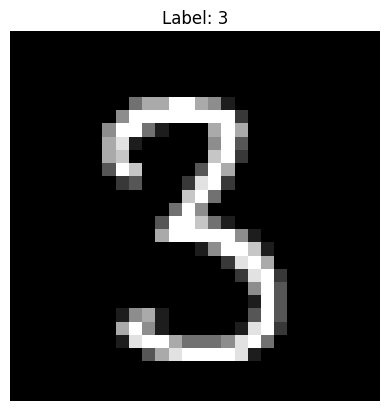

In [15]:
import matplotlib.pyplot as plt

plt.imshow(x_train[12334], cmap='gray')
plt.title(f"Label: {y_train[1234]}")
plt.axis('off')
plt.show()

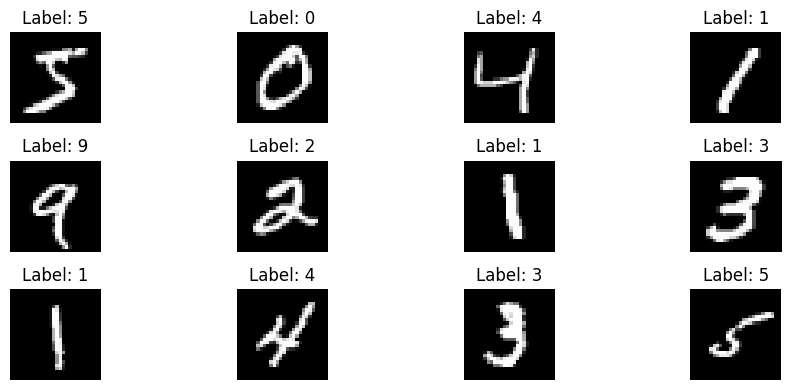

In [16]:
import matplotlib.pyplot as plt

num_images = 12
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


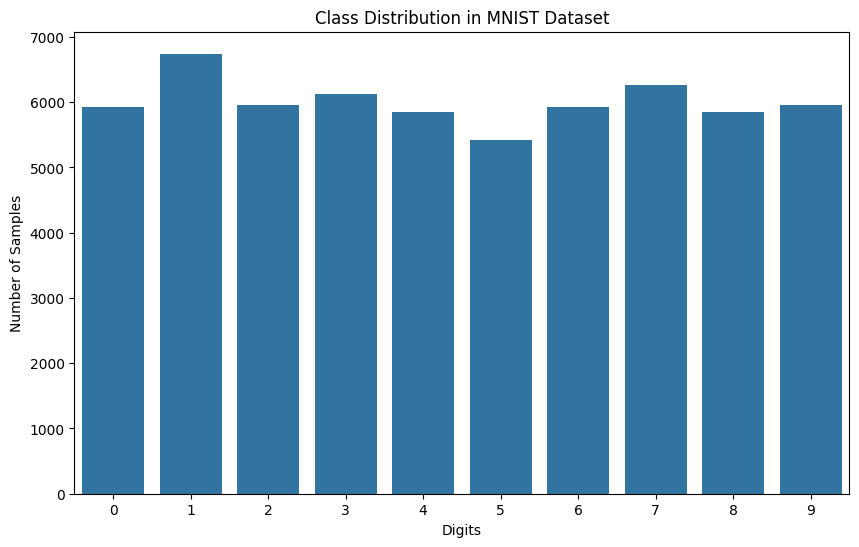

In [17]:
import seaborn as sns
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Class Distribution in MNIST Dataset')
plt.xlabel('Digits')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

In [18]:
base_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


c:\Users\neszm\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

base_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#base_model.fit(x_train, y_train, epochs=5)
history = base_model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)  # Optional, for validation accuracy
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8710 - loss: 0.4487 - val_accuracy: 0.9562 - val_loss: 0.1457
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9638 - loss: 0.1253 - val_accuracy: 0.9707 - val_loss: 0.0973
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9769 - loss: 0.0784 - val_accuracy: 0.9728 - val_loss: 0.0851
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9825 - loss: 0.0573 - val_accuracy: 0.9750 - val_loss: 0.0804
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0453 - val_accuracy: 0.9748 - val_loss: 0.0815


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


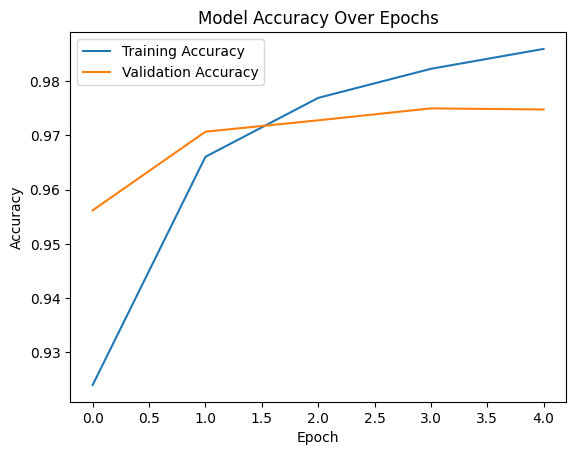

In [20]:
print(history.history.keys())  # Typically includes 'accuracy' and 'val_accuracy'

plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
CNNmodel = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])


c:\Users\neszm\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

CNNmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#CNNmodel.fit(x_train, y_train, epochs=5)
history = CNNmodel.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)  # Optional, for validation accuracy
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5550 - loss: 1.6101 - val_accuracy: 0.8781 - val_loss: 0.4435
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8791 - loss: 0.4272 - val_accuracy: 0.8993 - val_loss: 0.3438
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8977 - loss: 0.3479 - val_accuracy: 0.9094 - val_loss: 0.3167
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9043 - loss: 0.3285 - val_accuracy: 0.9132 - val_loss: 0.2976
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9097 - loss: 0.3061 - val_accuracy: 0.9151 - val_loss: 0.2908


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


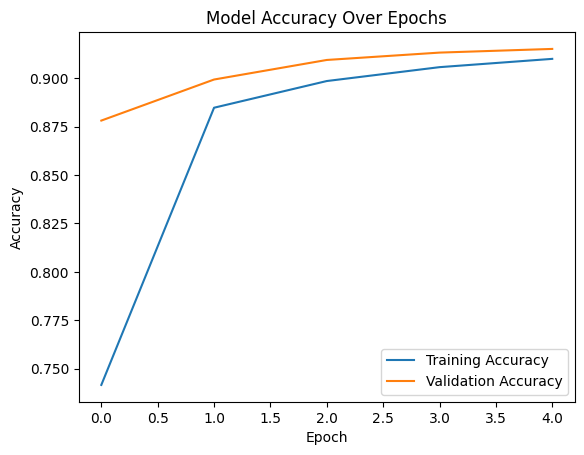

In [23]:
print(history.history.keys())  # Typically includes 'accuracy' and 'val_accuracy'

plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

what if we run them for longer does that help?

In [26]:
history = base_model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)  # Optional, for validation accuracy
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9493 - loss: 0.1762 - val_accuracy: 0.9505 - val_loss: 0.1765
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9507 - loss: 0.1751 - val_accuracy: 0.9484 - val_loss: 0.1746
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9537 - loss: 0.1608 - val_accuracy: 0.9536 - val_loss: 0.1634
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9554 - loss: 0.1587 - val_accuracy: 0.9542 - val_loss: 0.1591
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9575 - loss: 0.1519 - val_accuracy: 0.9562 - val_loss: 0.1541
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9600 - loss: 0.1447 - val_accuracy: 0.9575 - val_loss: 0.1493
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9613 - loss: 0.1410 - val_accuracy: 0.9586 - val_loss: 0.1457
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9627 - loss: 0.1325 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


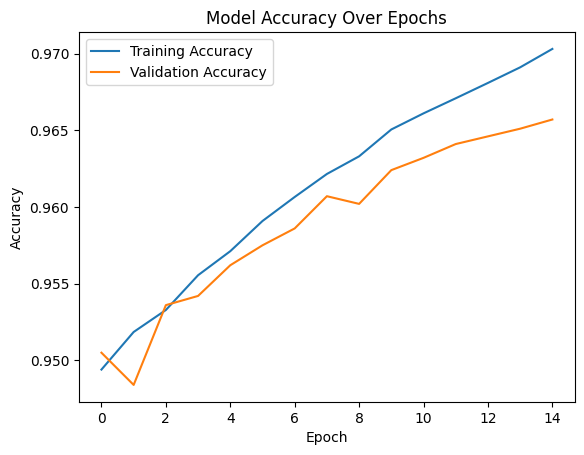

In [27]:
print(history.history.keys())  # Typically includes 'accuracy' and 'val_accuracy'

plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [28]:
history = CNNmodel.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)  # Optional, for validation accuracy
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9260 - loss: 0.2564 - val_accuracy: 0.9269 - val_loss: 0.2538
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9268 - loss: 0.2578 - val_accuracy: 0.9293 - val_loss: 0.2502
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.9282 - loss: 0.2482 - val_accuracy: 0.9316 - val_loss: 0.2460
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9284 - loss: 0.2504 - val_accuracy: 0.9288 - val_loss: 0.2503
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9295 - loss: 0.2470 - val_accuracy: 0.9305 - val_loss: 0.2436
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9320 - loss: 0.2377 - val_accuracy: 0.9316 - val_loss: 0.2455
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9305 - loss: 0.2403 - val_accuracy: 0.9330 - val_loss: 0.2377
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9335 - loss: 0

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


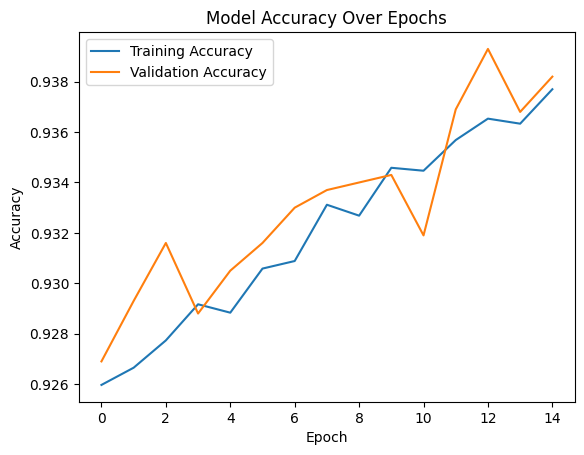

In [29]:
print(history.history.keys())  # Typically includes 'accuracy' and 'val_accuracy'

plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()